<div style="text-align: center;">

# MA 203: Numerical Methods
## Assignment-1

Shardul Junagade <br>
23110297

</div>

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

## **Question 1**

1. (2 points) Using the convergence result for fixed-point iteration (refer to the lecture), show that $g(x) = \frac{x^2 - 1}{3}$ satisfies the hypothesis of the theorem and hence has a unique fixed point on the interval $[-1, 1]$. Also, find the fixed point $x$ such that $x = g(x)$.

### **Solution:**

![Solution 1](./images/assignment1/1.jpg)

![Solution 1](./images/assignment1/2.jpg)

![Solution 1](./images/assignment1/3.jpg)

Does g(x) map [-1, 1] into itself?: True
Max |g'(x)| on [-1, 1]: 0.6666666666666666


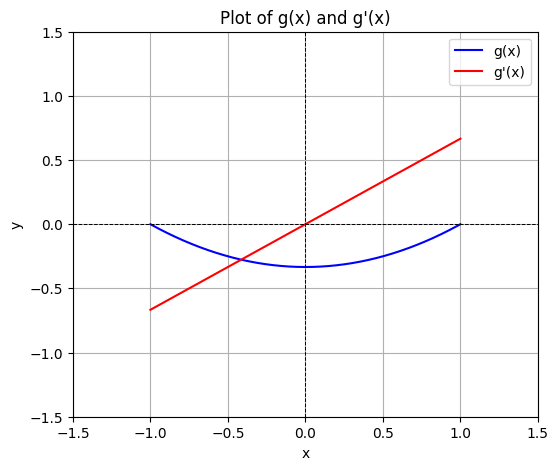

In [2]:
# Define the function g(x)
def g(x):
    return (x**2 - 1)/3

# Derivative of g(x) to verify contraction
def g_prime(x):
    return (2*x)/3

# Check if g maps [-1, 1] into itself
x_vals = np.linspace(-1, 1, 1000)
g_vals = g(x_vals)
g_prime_vals = g_prime(x_vals)
g_interval = np.all((g_vals >= -1) & (g_vals <= 1))
print("Does g(x) map [-1, 1] into itself?:", g_interval)

# Check maximum |g'(x)| on [-1, 1]
max_derivative = np.max(np.abs(g_prime(x_vals)))
print("Max |g'(x)| on [-1, 1]:", max_derivative)

# plot g(x) and g'(x)
plt.figure(figsize=(6, 5))
plt.plot(x_vals, g_vals, label='g(x)', color='blue')
plt.plot(x_vals, g_prime_vals, label="g'(x)", color='red')
plt.axhline(0, color='black', lw=0.7, ls='--')
plt.axvline(0, color='black', lw=0.7, ls='--')
plt.title('Plot of g(x) and g\'(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [3]:
# Use fixed-point iteration to find fixed point
def fixed_point_iteration(g, x_start, tol=1e-8, max_iter=100):
    x_old = x_start
    print(f"Iteration 0: x = {x_old}")
    for i in range(1, max_iter+1):
        x_new = g(x_old)
        print(f"Iteration {i}: x = {x_new:.10f}")
        if abs(x_new - x_old) < tol*abs(x_new):
            print(f"Converged after {i} iterations to {x_new:.10f}\n")
            return x_new
        x_old = x_new
    print("Did not converge\n")
    return None

fixed_point = fixed_point_iteration(g, -1)
print(f"Fixed point found: {fixed_point:.10f}")

Iteration 0: x = -1
Iteration 1: x = 0.0000000000
Iteration 2: x = -0.3333333333
Iteration 3: x = -0.2962962963
Iteration 4: x = -0.3040695016
Iteration 5: x = -0.3025139127
Iteration 6: x = -0.3028284442
Iteration 7: x = -0.3027649778
Iteration 8: x = -0.3027777894
Iteration 9: x = -0.3027752034
Iteration 10: x = -0.3027757254
Iteration 11: x = -0.3027756200
Iteration 12: x = -0.3027756413
Iteration 13: x = -0.3027756370
Iteration 14: x = -0.3027756379
Converged after 14 iterations to -0.3027756379

Fixed point found: -0.3027756379


## **Question 2:**


2. (3 points) Let $f(x) = x^2 - a$.

    a. Show that the Newton-Raphson Method leads to the following recurrence  
    $$x_{n+1} = \frac{1}{2} \left( x_n + \frac{a}{x_n} \right)$$

    It is still at the heart of computer algorithms for finding square roots.

    b. Take $a = 10$ and $x_0 = 3$, then show manual calculation to find $x_1$ and $x_2$ using Newton-Raphson's method.

    c. Write a program to solve (b) till the absolute percent approximate error is less than $10^{-8}$ and print the result at what iteration it is attainable. The final answer is an approximation of $\sqrt{10}$.



### **Solution:**

![Solution2](./images/assignment1/4.jpg)

![Solution 2](./images/assignment1/5.jpg)

In [4]:
# Newton-Raphson method for square root
def newton_raphson_sqrt(a, x_old, tol=1e-8, max_iter=1000):
    print(f"Iteration 0: x = {x_old}")
    for i in range(1, max_iter+1):
        x_new = (1/2)*(x_old + a/x_old)
        print(f"Iteration {i}: x = {x_new}")
        if 100*abs(x_new-x_old)/abs(x_new) < tol:
            print(f"Converged after {i} iterations to {x_new}\n")
            return x_new
        x_old = x_new
    print("Did not converge\n")
    return None

a = 10
x0 = 3
sqrt_approx = newton_raphson_sqrt(a, x0)
print(f"Approximate square root of {a}: {sqrt_approx}")
print(f"Exact square root of {a}      : {np.sqrt(a)}")

Iteration 0: x = 3
Iteration 1: x = 3.166666666666667
Iteration 2: x = 3.162280701754386
Iteration 3: x = 3.162277660169842
Iteration 4: x = 3.162277660168379
Converged after 4 iterations to 3.162277660168379

Approximate square root of 10: 3.162277660168379
Exact square root of 10      : 3.1622776601683795


## **Question 3:**

3. (5 points) **Compute Doolittle’s factorization**

    In Doolittle’s factorization, write $A = LU$, where $L$ is a lower triangular matrix with **diagonal entries as 1** and $U$ is an upper triangular matrix.

    a. Determine the Doolittle’s factorization for matrix $A$ in the linear system $Ax = b$, where  

    $$A = 
    \begin{bmatrix}
    1 & 1 & 0 & 3 \\
    2 & 1 & -1 & 1 \\
    3 & -1 & -1 & 2 \\
    -1 & 2 & 3 & -1
    \end{bmatrix} \quad \text{and} \quad b = 
    \begin{bmatrix}
    1 \\
    1 \\
    -3 \\
    4
    \end{bmatrix}$$

    b. Then use the factorization to solve the system manually  

    $$x_1 + x_2 + 3x_4 = 1$$

    $$2x_1 + x_2 - x_3 + x_4 = 1$$

    $$3x_1 - x_2 - x_3 + 2x_4 = -3$$

    $$-x_1 + 2x_2 + 3x_3 - x_4 = 4$$


    c. Write a program for LU decomposition to solve the above system of equations. 


### **Solution:**

![Solution 3](./images/assignment1/6.jpg)

![Solution 3](./images/assignment1/7.jpg)

![Solution 3](./images/assignment1/8.jpg)

In [5]:
# LU Decomposition using Doolittle's method
def doolittle_LU(A):
    n = len(A)
    L = np.identity(n)
    U = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k]*U[k][j] for k in range(i))
        for j in range(i+1, n):
            L[j][i] = (A[j][i] - sum(L[j][k]*U[k][i] for k in range(i))) / U[i][i]
    return L, U

# Forward Substitution
def forward_substitution(L, b):
    y = np.zeros_like(b, dtype=float)
    for i in range(len(b)):
        y[i] = b[i] - sum(L[i][j]*y[j] for j in range(i))
    return y

# Backward Substitution
def backward_substitution(U, y):
    n = len(y)
    x = np.zeros_like(y, dtype=float)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - sum(U[i][j]*x[j] for j in range(i+1, n))) / U[i][i]
    return x

In [6]:
A = np.array([[1, 1,  0,  3],
              [2, 1, -1,  1],
              [3, -1, -1, 2],
              [-1, 2, 3, -1]], dtype=float)

b = np.array([1, 1, -3, 4], dtype=float)

# LU Decomposition
L, U = doolittle_LU(A)
# Forward substitution to solve Ly = b
y = forward_substitution(L, b)
# Backward substitution to solve Ux = y
x = backward_substitution(U, y)


print("\nMatrix A:\n", A)
print("\nVector b:\n", b)
print("\nLower triangular matrix L:\n", L)
print("\nUpper triangular matrix U:\n", U)
print("\nIntermediate vector y (Solution of Ly = b):\n", y)

# Final solution vector x
# (Solution of Ax = b and Ux = y)
print("\nSolution vector x (Solution of Ax = b and Ux = y):\n", x)


Matrix A:
 [[ 1.  1.  0.  3.]
 [ 2.  1. -1.  1.]
 [ 3. -1. -1.  2.]
 [-1.  2.  3. -1.]]

Vector b:
 [ 1.  1. -3.  4.]

Lower triangular matrix L:
 [[ 1.  0.  0.  0.]
 [ 2.  1.  0.  0.]
 [ 3.  4.  1.  0.]
 [-1. -3.  0.  1.]]

Upper triangular matrix U:
 [[  1.   1.   0.   3.]
 [  0.  -1.  -1.  -5.]
 [  0.   0.   3.  13.]
 [  0.   0.   0. -13.]]

Intermediate vector y (Solution of Ly = b):
 [ 1. -1. -2.  2.]

Solution vector x (Solution of Ax = b and Ux = y):
 [-0.30769231  1.76923077  0.         -0.15384615]


In [7]:
print("Exact solution of Ax = b:\n", np.round(np.linalg.solve(A, b), 8))

Exact solution of Ax = b:
 [-0.30769231  1.76923077 -0.         -0.15384615]


## What I learned from this assignment:

- The method of fixed-point iteration and how to apply it to find fixed points of functions.
- How to apply the Newton-Raphson method to find square roots using iteration.
- Wrote a Python program to implement the Doolittle's factorization method for solving linear systems of equations.
- Gained a deeper understanding of matrix factorization techniques and their applications in numerical methods.